In [8]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
#load the dataset
df = pd.read_csv('data/Stud.csv')

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.shape

(1000, 8)

In [17]:
#Data checks 
df.isna().sum()
  

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [21]:
df.info()
#check the data types
df.dtypes
#check the unique values in each column 
df.nunique()
#check the statistical summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [23]:
df.describe()
#check the correlation between the columns


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [25]:
df.head()  # Display the first few rows of the dataset


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
print("categories in  'gender' variable :",end=' ') 
print(df['gender'].unique())
print("categories   in 'race/ethnicity' variable :",end=' ')
print(df['race/ethnicity'].unique())
print("categories in 'parental level of education' variable :",end=' ')
print(df['parental level of education'].unique())   
print("categories in 'lunch' variable :",end=' ')
print(df['lunch'].unique()) 
print("categories in 'test preparation course' variable :",end=' ')
print(df['test preparation course'].unique())

categories in  'gender' variable : ['female' 'male']
categories   in 'race/ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable : ['standard' 'free/reduced']
categories in 'test preparation course' variable : ['none' 'completed']


In [29]:
numeric_features =[feature for feature in df.columns if df[feature].dtype != 'O']
# Identify categorical features
categorical_features =[feature for feature in df.columns if df[feature].dtype == 'O']
# Display the numeric features
print("Numeric features:", numeric_features)
# Display the categorical features  
print("Categorical features:", categorical_features)
# Visualize the distribution of each numeric feature

Numeric features: ['math score', 'reading score', 'writing score']
Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [35]:
#FEATURE ENGINEERING
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
# Create a new column for average score 
df['average_score'] = df['total_score'] / 3
# Create a new column for total score
print("New columns created: 'total_score' and 'average_score'")
df.head()


New columns created: 'total_score' and 'average_score'


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [39]:
reading_score_mean = df[df['reading score']==100]['average_score'].count()
writing_score_mean = df[df['writing score']==100]['average_score'].count()
math_full_score_mean = df[df['math score']==100]['average_score'].count()
print(f"Number of students with full reading score: {reading_score_mean}")
print(f"Number of students with full writing score: {writing_score_mean}")
print(f"Number of students with full math score: {math_full_score_mean}")


Number of students with full reading score: 17
Number of students with full writing score: 14
Number of students with full math score: 7


In [41]:
reading_less20 = df[df['reading score']<=20]['average_score'].count()
writing_less20 = df[df['writing score']<=20]['average_score'].count()
math_full_less20 = df[df['math score']<=20]['average_score'].count()
print(f"Number of students with full reading score: {reading_less20}")
print(f"Number of students with full writing score: {writing_less20}")
print(f"Number of students with full math score: {math_full_less20}")


Number of students with full reading score: 1
Number of students with full writing score: 3
Number of students with full math score: 4


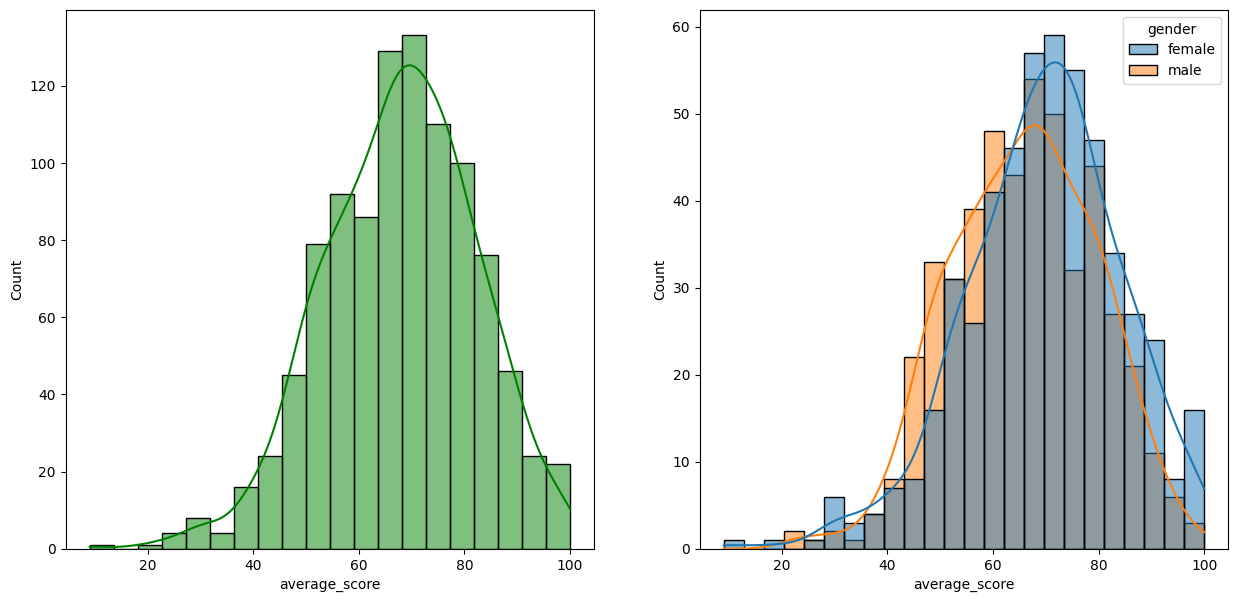

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score' ,bins=20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score', kde=True, hue='gender')
plt.show()